# 서울시 구별 인구 현황

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

from IPython.display import Image


reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 
    
population_xls = './seoul_data/Report_seoul_population_2019_2Q.xls'

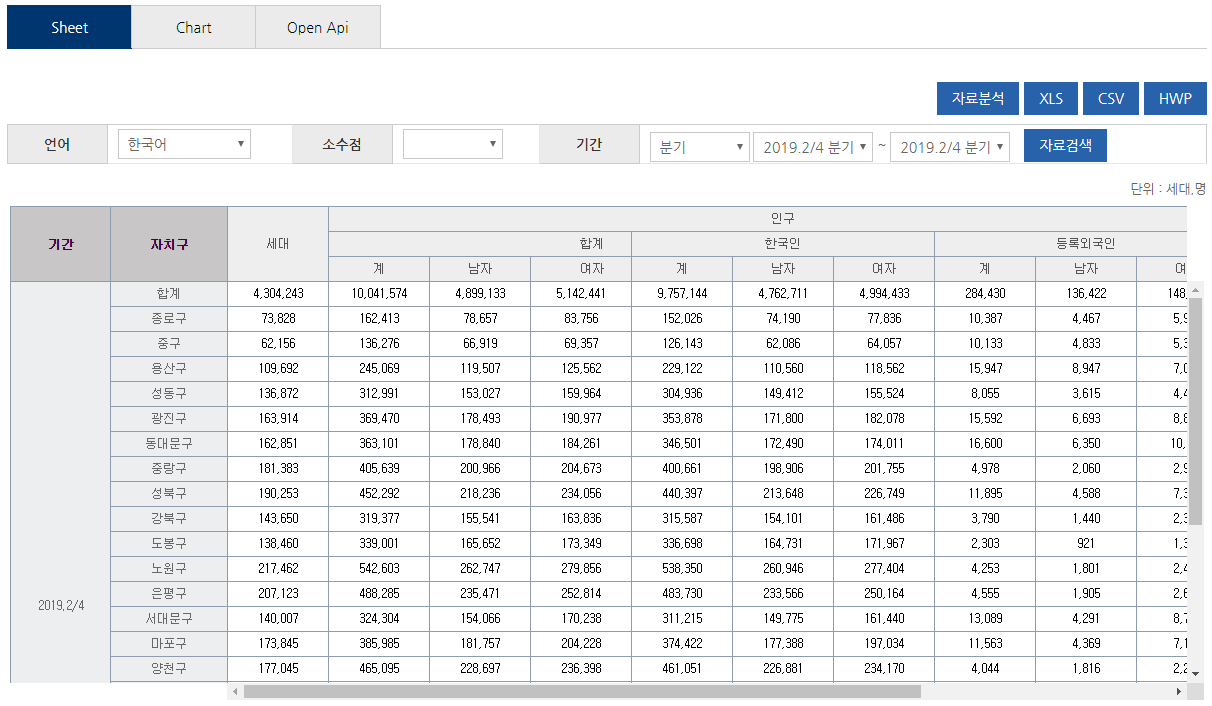

In [5]:
# 저거는 곧 사라지는 거인듯
# 세 번째 값을 헤드로 해서 컬럼은 B부터 5개까지, 기간이 A임
population = pd.read_excel(population_xls, 
                           header=2,
#                           parse_cols="B, C, D, M, N" 
                           usecols="B, C, D, M, N"
                    )
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4304243,10041574,2.27,1451564
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370


In [7]:
population.tail()

,자치구,세대,계,세대당인구,65세이상고령자
21,관악구,266692,519864,1.88,73693
22,서초구,172907,435631,2.49,55853
23,강남구,230752,547602,2.35,69011
24,송파구,278223,686181,2.44,84740
25,강동구,177368,428547,2.39,60657


# unique 체크후, 합계 nan 부분을 drop

In [8]:
population['자치구'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [9]:
# 합계를 지워주자
population = population.drop([0])
population

,자치구,세대,계,세대당인구,65세이상고령자
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370
5,광진구,163914,369470,2.16,46773
6,동대문구,162851,363101,2.13,58078
7,중랑구,181383,405639,2.21,63670
8,성북구,190253,452292,2.31,69341
9,강북구,143650,319377,2.20,59189
10,도봉구,138460,339001,2.43,57367


In [10]:
population['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [11]:
# 컬럼명 변경
population.rename(columns = {'계':'인구수'}, inplace=True)
population.rename(columns = {'자치구':'구'}, inplace=True)
population.head()

,구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370
5,광진구,163914,369470,2.16,46773


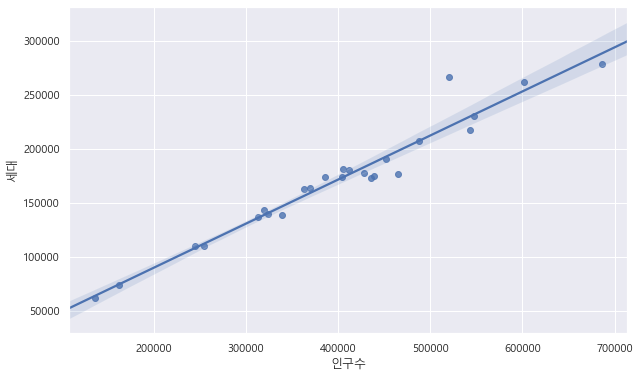

In [12]:
sns.regplot(x="인구수", y="세대", data=population);

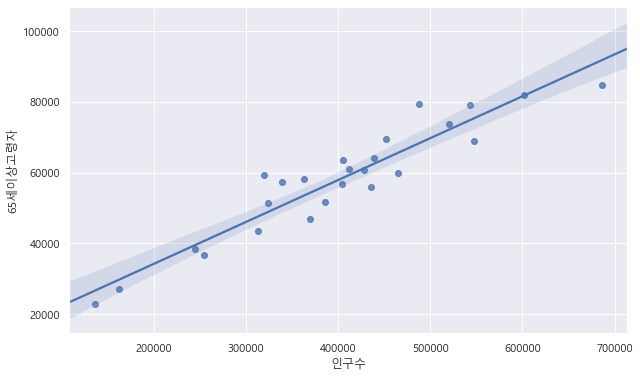

In [13]:
sns.regplot(x="인구수", y="65세이상고령자", data=population);

In [14]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [16]:
geo_path = 'seoul_data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [17]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat.head()

,gu,counts
1,종로구,162413
2,중구,136276
3,용산구,245069
4,성동구,312991
5,광진구,369470


In [19]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [20]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

In [21]:
map

In [22]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [23]:
map

In [24]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['65세이상고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [25]:
map

In [26]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['세대당인구']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [27]:
map

In [28]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
1,종로구,73828,162413,2.06,27155,16.719721
2,중구,62156,136276,2.03,22749,16.693328
3,용산구,109692,245069,2.09,38259,15.611522
4,성동구,136872,312991,2.23,43370,13.856628
5,광진구,163914,369470,2.16,46773,12.659485


In [29]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [30]:
map

In [31]:
population.sort_values(by='65세이상고령자', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
24,송파구,278223,686181,2.44,84740,12.349511
16,강서구,261383,602230,2.28,81965,13.610249
12,은평구,207123,488285,2.34,79282,16.236829
11,노원구,217462,542603,2.48,79046,14.567925
21,관악구,266692,519864,1.88,73693,14.175438


In [32]:
population.sort_values(by='인구수', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
24,송파구,278223,686181,2.44,84740,12.349511
16,강서구,261383,602230,2.28,81965,13.610249
23,강남구,230752,547602,2.35,69011,12.602401
11,노원구,217462,542603,2.48,79046,14.567925
21,관악구,266692,519864,1.88,73693,14.175438


In [33]:
population.sort_values(by='세대당인구', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
15,양천구,177045,465095,2.60,59731,12.842753
22,서초구,172907,435631,2.49,55853,12.821172
11,노원구,217462,542603,2.48,79046,14.567925
24,송파구,278223,686181,2.44,84740,12.349511
10,도봉구,138460,339001,2.43,57367,16.922369


In [34]:
population.sort_values(by='고령비율', ascending=False).head(5)

,구,세대,인구수,세대당인구,65세이상고령자,고령비율
9,강북구,143650,319377,2.20,59189,18.532643
10,도봉구,138460,339001,2.43,57367,16.922369
1,종로구,73828,162413,2.06,27155,16.719721
2,중구,62156,136276,2.03,22749,16.693328
12,은평구,207123,488285,2.34,79282,16.236829


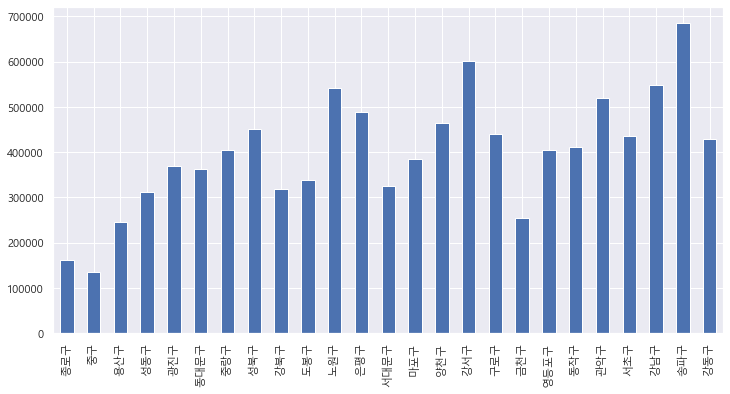

In [35]:
plt.rcParams["figure.figsize"] = [12,6]
df_population = pd.Series(population['인구수'].values, index=population['구'].values)
df_population.plot(kind='bar')

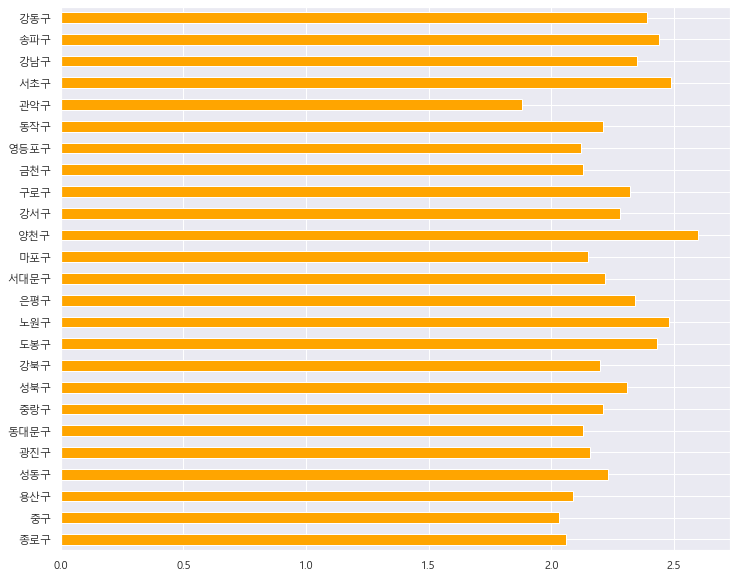

In [36]:
plt.rcParams["figure.figsize"] = [12,10]
df_population = pd.Series(population['세대당인구'].values, index=population['구'].values)
df_population.plot(kind='barh', color='orange')

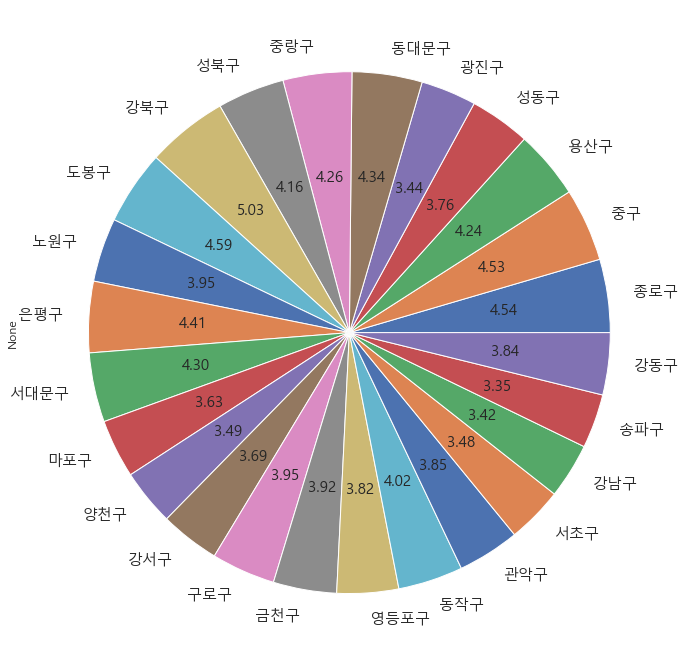

In [37]:
plt.rcParams["figure.figsize"] = [12,12]
df_population = pd.Series(population['고령비율'].values, index=population['구'].values)
df_population.plot(kind='pie', autopct='%.2f', fontsize=15)

In [38]:
population.to_csv('seoul_data/seoul_population.csv', sep=',', index=False, encoding='euc-kr')